## 신경망 학습  
함수 𝑓(𝑥0 , 𝑥1 ) = 𝑥0^2 + 𝑥1^2 의 각 좌표의 접선의 기울기를 2차원 평면에 표현하시오

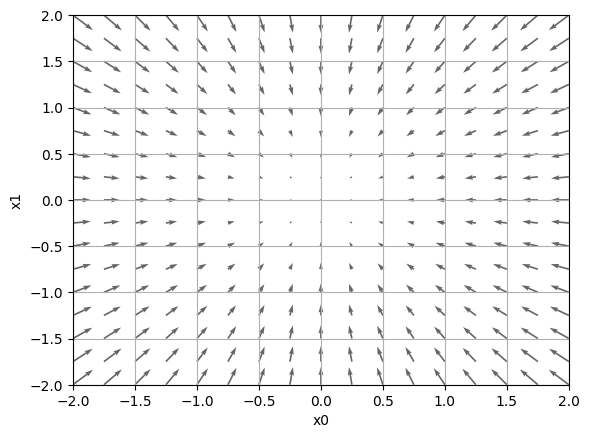

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 2차원 수치미분 함수
def _numerical_gradient_no_batch(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # h(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # h(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원


    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        # 변수가 하나일 때 수치미분
        return _numerical_gradient_no_batch(f, X)
    else:
        # 변수가 두 개 이상일 때 수치미분
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    # 변수가 하나일 때
    if x.ndim == 1:
        return np.sum(x**2)

    # 변수가 두 개일 때
    else:
        return np.sum(x**2, axis=1)

# 접선을 구하는 함수
def tanget_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1) # 2차원의 빈 평면을 만드는 함수

    # 2차 평면을 1차원으로 평탄화
    X = X.flatten()
    Y = Y.flatten()

    # 각 좌표에 대한 기울기 계산
    grad = numerical_gradient(function_2, np.array([X, Y]))
    # print(grad)

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    # plt.legend()
    plt.draw()
    plt.show()